In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np

In [2]:
num_classes = 10
num_features = 784

learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step = 100

n_hidden_1 = 128 
n_hidden_2 = 256 

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(100, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

169001437/169001437 [==============================] - 395s 2us/step
Epoch 1/2
1563/1563 [==============================] - 40s 25ms/step - loss: 3.9972 - accuracy: 0.0875 - val_loss: 3.5963 - val_accuracy: 0.1455
Epoch 2/2
1563/1563 [==============================] - 42s 27ms/step - loss: 3.3895 - accuracy: 0.1832 - val_loss: 3.2595 - val_accuracy: 0.2126
313/313 - 2s - loss: 3.2595 - accuracy: 0.2126 - 2s/epoch - 6ms/step

Test accuracy: 0.2125999927520752


In [4]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [19]:

import tensorflow as tf
from tensorflow.keras import layers, models

class NeuralNet(tf.keras.Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden_1, activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden_2, activation=tf.nn.relu)
        self.out = layers.Dense(num_classes, activation=tf.nn.softmax)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)

        if not is_training:
            x = tf.nn.softmax(x)

        return x


neural_net = NeuralNet()

In [6]:
import tensorflow as tf

def cross_entropy_loss(x, y):

    y = tf.cast(y, tf.int64)
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)

    return tf.reduce_mean(loss)

def accuracy(y_pred, y_true):

    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

optimizer = tf.optimizers.SGD(learning_rate)

In [7]:

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
    trainable_variables = neural_net.trainable_variables
    gradients = g.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [8]:

import matplotlib.pyplot as plt


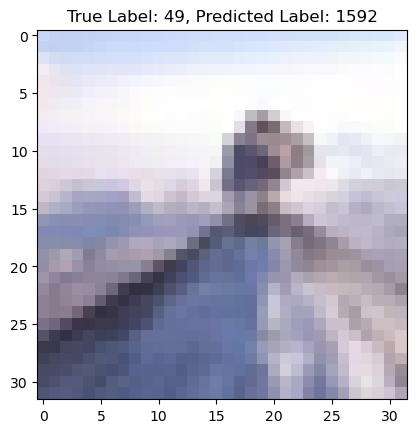

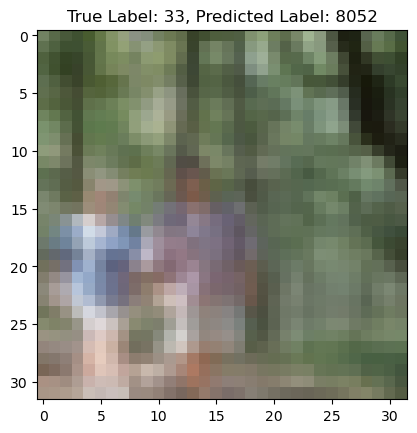

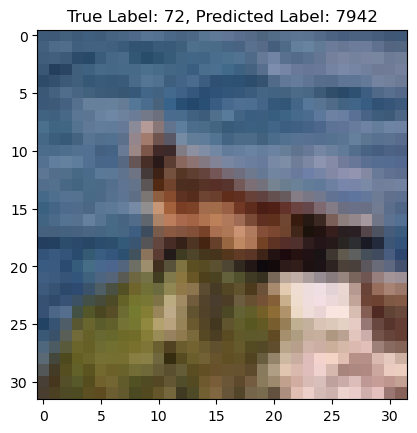

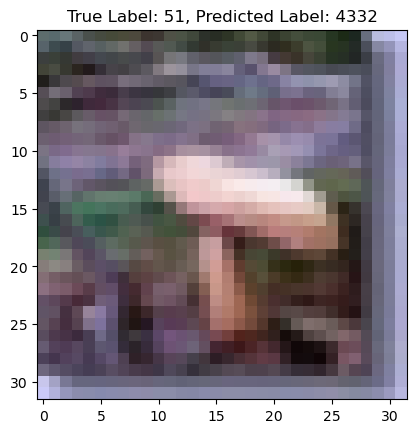

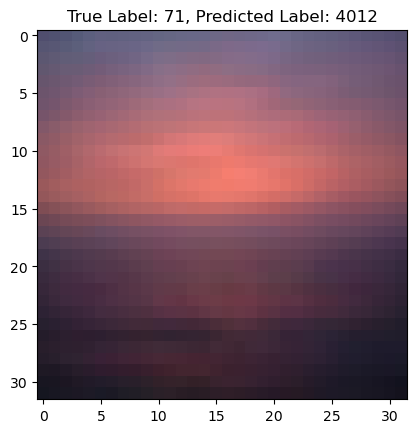

In [26]:
import matplotlib.pyplot as plt
import numpy as np

n_images = 5
test_images = x_test[:n_images]
true_labels = y_test[:n_images]

predictions = neural_net(test_images)
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [32, 32, 3]), cmap='gray')

    plt.title(f'True Label: {np.argmax(true_labels[i])}, Predicted Label: {np.argmax(predictions[i].numpy())}')
    plt.show()

# Sequential API for Mnist Dataset

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop

In [40]:
batch_size=128
num_classes=10
epochs=20

In [41]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()
print('Shape-x:\t',xtrain.shape)
print('Shape-y:\t',ytrain.shape)

Shape-x:	 (60000, 28, 28)
Shape-y:	 (60000,)


In [42]:
xtrain=xtrain.reshape(60000,784)
xtest=xtest.reshape(10000,784)
print('Shape-x-train:\t',xtrain.shape)
print('Shape-x-Test:\t',xtest.shape)

Shape-x-train:	 (60000, 784)
Shape-x-Test:	 (10000, 784)


In [43]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [44]:
xtrain=xtrain/255.
xtest=xtest/255.

In [45]:
print(xtrain.shape[0],'train samples')
print(xtest.shape[0],'test samples')

60000 train samples
10000 test samples


In [46]:
import keras
ytrain=keras.utils.to_categorical(ytrain,num_classes)
ytest=keras.utils.to_categorical(ytest,num_classes)

In [47]:
ytrain.shape

(60000, 10)

In [35]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [49]:
histroy=model.fit(xtrain,ytrain,
 batch_size=batch_size,
 epochs=epochs,
 verbose=2,
 validation_data=(xtest,ytest))
score=model.evaluate(xtest,ytest,verbose=1)

Epoch 1/20
469/469 - 5s - loss: 0.5421 - accuracy: 0.8029 - val_loss: 0.5131 - val_accuracy: 0.8018 - 5s/epoch - 12ms/step
Epoch 2/20
469/469 - 5s - loss: 0.3761 - accuracy: 0.8603 - val_loss: 0.4117 - val_accuracy: 0.8471 - 5s/epoch - 10ms/step
Epoch 3/20
469/469 - 5s - loss: 0.3309 - accuracy: 0.8770 - val_loss: 0.3631 - val_accuracy: 0.8660 - 5s/epoch - 10ms/step
Epoch 4/20
469/469 - 5s - loss: 0.3040 - accuracy: 0.8859 - val_loss: 0.3470 - val_accuracy: 0.8722 - 5s/epoch - 10ms/step
Epoch 5/20
469/469 - 5s - loss: 0.2850 - accuracy: 0.8934 - val_loss: 0.3698 - val_accuracy: 0.8688 - 5s/epoch - 10ms/step
Epoch 6/20
469/469 - 5s - loss: 0.2676 - accuracy: 0.8991 - val_loss: 0.3636 - val_accuracy: 0.8721 - 5s/epoch - 10ms/step
Epoch 7/20
469/469 - 5s - loss: 0.2565 - accuracy: 0.9030 - val_loss: 0.4072 - val_accuracy: 0.8508 - 5s/epoch - 10ms/step
Epoch 8/20
469/469 - 5s - loss: 0.2436 - accuracy: 0.9079 - val_loss: 0.3862 - val_accuracy: 0.8807 - 5s/epoch - 11ms/step
Epoch 9/20
469/4

In [50]:
print('Test Loss:\t',score[0])
print('Test Accuracy:\t',score[1])

Test Loss:	 0.5208128094673157
Test Accuracy:	 0.8797000050544739
